In [1]:
# Import our dependencies
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import holoviews as hv
import pandas as pd
import numpy as np
import hvplot.pandas

In [2]:
# upload tb cases dataset and display top 5 rows
tb_df = pd.read_csv("Resources/merged_cases.csv")
tb_df.head()

,Year,Geography,American Indian/Alaska Native,Asian,Black/African American,Hispanic/Latino,Multiracial,Native Hawaiian/Other Pacific Islander,Unknown,White,...,U.S.-born,0-4,14-May,15-24,25-34,35-44,45-54,55-64,65+,Sum
0,2000,Alabama,1,7,177,12,0,0,0,113,...,288,8,8,16,29,62,51,38,98,310
1,2000,Alaska,71,15,9,2,0,2,0,9,...,93,18,11,13,8,26,8,12,12,108
2,2000,Arizona,29,28,21,140,0,1,0,42,...,112,12,6,33,43,48,43,22,54,261
3,2000,Arkansas,1,10,71,20,0,6,4,87,...,165,9,16,20,17,24,24,20,69,199
4,2000,California,15,"1,333",318,"1,201",0,20,17,384,...,904,115,89,327,537,520,505,433,762,3288


# New Section

In [3]:
#show column names
tb_df.columns

Index(['Year', 'Geography', 'American Indian/Alaska Native', 'Asian',
       'Black/African American', 'Hispanic/Latino', 'Multiracial',
       'Native Hawaiian/Other Pacific Islander', 'Unknown', 'White', 'Female',
       'Male', 'Non-U.S.–born', 'U.S.-born', '0-4', '14-May', '15-24', '25-34',
       '35-44', '45-54', '55-64', '65+', 'Sum'],
      dtype='object')

In [4]:
#drop unnecessary columns, check updated columns list and data types
tb_df.drop(['American Indian/Alaska Native', 'Asian',
       'Black/African American', 'Hispanic/Latino', 'Multiracial',
       'Native Hawaiian/Other Pacific Islander', 'Unknown', 'White',
        'Non-U.S.–born', 'U.S.-born',], axis=1, inplace=True)
tb_df.dtypes

Year          int64
Geography    object
Female       object
Male         object
0-4           int64
14-May        int64
15-24         int64
25-34         int64
35-44         int64
45-54         int64
55-64         int64
65+           int64
Sum           int64
dtype: object

In [5]:
#strip all the , s out from numbers and remove (COVID-19 Pandemic) from year column
tb_df = tb_df.replace({',': '', ' \(COVID-19 Pandemic\)': ''}, regex=True)
#convert incorrectly classified object columns to integers
convert_columns = ['Year', 'Female','Male']
tb_df[convert_columns] = tb_df[convert_columns].astype(int)
tb_df.dtypes

Year          int32
Geography    object
Female        int32
Male          int32
0-4           int64
14-May        int64
15-24         int64
25-34         int64
35-44         int64
45-54         int64
55-64         int64
65+           int64
Sum           int64
dtype: object

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
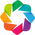

:Scatter   [Year]   (Sum,Geography)

In [6]:
hv.extension('bokeh')
tb_grouped_plot = tb_df.hvplot.scatter(
    x="Year",
    y="Sum",
    title="TB Cases Reported by Year",
    hover_cols=["Geography"]  # Add the names of the columns you want to include in the hover tooltip
)
tb_grouped_plot

In [7]:
# Convert state data to numeric with `pd.get_dummies`
tb_df = pd.get_dummies(tb_df, dtype=int)
tb_df.head()

,Year,Female,Male,0-4,14-May,15-24,25-34,35-44,45-54,55-64,...,Geography_South Dakota,Geography_Tennessee,Geography_Texas,Geography_Utah,Geography_Vermont,Geography_Virginia,Geography_Washington,Geography_West Virginia,Geography_Wisconsin,Geography_Wyoming
0,2000,91,219,8,8,16,29,62,51,38,...,0,0,0,0,0,0,0,0,0,0
1,2000,41,67,18,11,13,8,26,8,12,...,0,0,0,0,0,0,0,0,0,0
2,2000,83,178,12,6,33,43,48,43,22,...,0,0,0,0,0,0,0,0,0,0
3,2000,70,129,9,16,20,17,24,24,20,...,0,0,0,0,0,0,0,0,0,0
4,2000,1316,1972,115,89,327,537,520,505,433,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#remove years after 2019 with the COVID data
tb_filtered = tb_df[tb_df['Year'] < 2020]
tb_filtered.head()

,Year,Female,Male,0-4,14-May,15-24,25-34,35-44,45-54,55-64,...,Geography_South Dakota,Geography_Tennessee,Geography_Texas,Geography_Utah,Geography_Vermont,Geography_Virginia,Geography_Washington,Geography_West Virginia,Geography_Wisconsin,Geography_Wyoming
0,2000,91,219,8,8,16,29,62,51,38,...,0,0,0,0,0,0,0,0,0,0
1,2000,41,67,18,11,13,8,26,8,12,...,0,0,0,0,0,0,0,0,0,0
2,2000,83,178,12,6,33,43,48,43,22,...,0,0,0,0,0,0,0,0,0,0
3,2000,70,129,9,16,20,17,24,24,20,...,0,0,0,0,0,0,0,0,0,0
4,2000,1316,1972,115,89,327,537,520,505,433,...,0,0,0,0,0,0,0,0,0,0


## Here we create two functions, one to create a linear regression model with a train/test split and the other without a split in order to compare the accuracy of the two.

In [9]:
#create function to run linear regression analysis on the data with training (2000-2017) and testing (2018, 2019)
def lr_model(df, model_info):
    #split data into testing and training
    train_data = df[df['Year'] < 2018]
    test_data = df[df['Year'] >= 2018]
    #split into features and targets
    X_train = train_data.drop(columns=["Sum"])
    X_test = test_data.drop(columns=["Sum"])
    y_train = train_data['Sum']
    y_test = test_data['Sum']
    #create the model
    model = LinearRegression()
    #fit the model
    model.fit(X_train, y_train)
    # Make predictions on testing data
    y_pred = model.predict(X_test)
    # Compute metrics
    score = model.score(X_test, y_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    std = np.std(y_test)
    # create dict to store results
    results_dict = {
        'Model Detail': model_info,
        'Score': score,
        'R2': r2,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Standard Deviation': std
    }
    return results_dict

In [10]:
#create function to run linear regression analysis on the data without training/testing split
def lr_model2(df, model_info):
    X = df.drop(columns=["Sum"])
    y = df['Sum']
    model = LinearRegression()
    #fit the model
    model.fit(X, y)
    # Make predictions on testing data
    y_pred = model.predict(X)
    # Compute metrics
    score = model.score(X, y)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    std = np.std(y)
    # create dict to store results
    results_dict2 = {
        'Model Detail': model_info,
        'Score2': score,
        'R22': r2,
        'Mean Squared Error2': mse,
        'Root Mean Squared Error2': rmse,
        'Standard Deviation2': std
    }
    return results_dict2

In [11]:
#save list of state name columns as a list
states = ['Geography_Alabama', 'Geography_Alaska',
       'Geography_Arizona', 'Geography_Arkansas', 'Geography_California',
       'Geography_Colorado', 'Geography_Connecticut', 'Geography_Delaware',
       'Geography_District of Columbia', 'Geography_Florida',
       'Geography_Georgia', 'Geography_Hawaii', 'Geography_Idaho',
       'Geography_Illinois', 'Geography_Indiana', 'Geography_Iowa',
       'Geography_Kansas', 'Geography_Kentucky', 'Geography_Louisiana',
       'Geography_Maine', 'Geography_Maryland', 'Geography_Massachusetts',
       'Geography_Michigan', 'Geography_Minnesota', 'Geography_Mississippi',
       'Geography_Missouri', 'Geography_Montana', 'Geography_Nebraska',
       'Geography_Nevada', 'Geography_New Hampshire', 'Geography_New Jersey',
       'Geography_New Mexico', 'Geography_New York',
       'Geography_North Carolina', 'Geography_North Dakota', 'Geography_Ohio',
       'Geography_Oklahoma', 'Geography_Oregon', 'Geography_Pennsylvania',
       'Geography_Rhode Island', 'Geography_South Carolina',
       'Geography_South Dakota', 'Geography_Tennessee', 'Geography_Texas',
       'Geography_Utah', 'Geography_Vermont', 'Geography_Virginia',
       'Geography_Washington', 'Geography_West Virginia',
       'Geography_Wisconsin', 'Geography_Wyoming']

In [12]:
#create the dataframes to be analyzed and a dictonary of the df names and descriptions to run LR model on

#group df by year:
yearly_cases = tb_filtered.groupby("Year", as_index=False).sum()
yearly_cases.drop(columns = states, inplace=True)

#add lags to original df
tb_df_with_lags = tb_filtered.copy()
for lag in range(1, 3):
    tb_df_with_lags[f'lag_{lag}'] = tb_df_with_lags['Sum'].shift(lag)
tb_df_with_lags.dropna(inplace=True)

#group df with lags by year
yearly_cases_with_lags = tb_df_with_lags.groupby("Year", as_index=False).sum()
yearly_cases_with_lags.drop(columns = states, inplace=True)

#drop age bins
no_ages = tb_filtered.copy()
no_ages.drop(columns = ['0-4', '14-May', '15-24', '25-34', '35-44',
       '45-54', '55-64', '65+'], inplace=True)

#group df with droped age bins by year
no_state_no_age = no_ages.copy()
no_state_no_age = no_state_no_age.groupby('Year', as_index=False).sum()
no_state_no_age.drop(columns = states, inplace=True)

#drop age bins from df with lags
no_ages_yes_lags = tb_df_with_lags.copy()
no_ages_yes_lags.drop(columns = ['0-4', '14-May', '15-24', '25-34', '35-44',
       '45-54', '55-64', '65+'], inplace=True)

#group df with dropped age bins and added lag by year
no_state_no_ages_yes_lags = no_ages_yes_lags.groupby('Year', as_index=False).sum()
no_state_no_ages_yes_lags.drop(columns = states, inplace=True)

dfs_and_info = {
    "By States, with age bins, no lag": tb_filtered,
    "By year, with age bins, no lag": yearly_cases,
    "By state, with age bins, and lags": tb_df_with_lags,
    "By year, with age bins, and lags": yearly_cases_with_lags,
    "By state, no age bins, no lags": no_ages,
    "By year, no age bins, no lags": no_state_no_age,
    "By state, no age bins, and lags": no_ages_yes_lags,
    "By year, no age bins, and lags": no_state_no_ages_yes_lags
        }


In [13]:
#create df and columns to hold the results from running 1st LR model with testing/training split
results_df_split = pd.DataFrame(columns =['Model Detail', 'Score', 'R2', 'Mean Squared Error',
       'Root Mean Squared Error', 'Standard Deviation'])

#loop through dict of dfs and info and add metrics to results df
for model_info, df in dfs_and_info.items():
    results_dict = lr_model(df, model_info)
    #turn dict that is output from function into df
    new_row = pd.DataFrame([results_dict])
    # concat to result df
    results_df_split = pd.concat([results_df_split, new_row], ignore_index=True)
results_df_split

,Model Detail,Score,R2,Mean Squared Error,Root Mean Squared Error,Standard Deviation
0,"By States, with age bins, no lag",1.0,1.0,3.426290e-26,1.851024e-13,336.179458
1,"By year, with age bins, no lag",1.0,1.0,1.654361e-24,1.286220e-12,49.500000
2,"By state, with age bins, and lags",1.0,1.0,3.989760e-25,6.316455e-13,336.179458
3,"By year, with age bins, and lags",1.0,1.0,1.654361e-24,1.286220e-12,49.500000
4,"By state, no age bins, no lags",1.0,1.0,4.947786e-26,2.224362e-13,336.179458
5,"By year, no age bins, no lags",1.0,1.0,3.308722e-24,1.818989e-12,49.500000
6,"By state, no age bins, and lags",1.0,1.0,2.731890e-26,1.652843e-13,336.179458
7,"By year, no age bins, and lags",1.0,1.0,1.323489e-23,3.637979e-12,49.500000


In [14]:
#create df and columns to hold the results from running 1st LR model without testing/training split
results_df_not_split = pd.DataFrame(columns =['Model Detail', 'Score2', 'R22', 'Mean Squared Error2',
       'Root Mean Squared Error2', 'Standard Deviation2'])

#loop through dict of dfs and info and add metrics to results df
for model_info, df in dfs_and_info.items():
    results_dict2 = lr_model2(df, model_info)
    #turn dict that is output from function into df
    new_row = pd.DataFrame([results_dict2])
    # concat to result df
    results_df_not_split = pd.concat([results_df_not_split, new_row], ignore_index=True)
results_df_not_split

,Model Detail,Score2,R22,Mean Squared Error2,Root Mean Squared Error2,Standard Deviation2
0,"By States, with age bins, no lag",1.0,1.0,5.096034e-26,2.257440e-13,430.440785
1,"By year, with age bins, no lag",1.0,1.0,7.444626e-24,2.728484e-12,2539.841401
2,"By state, with age bins, and lags",1.0,1.0,9.451531e-26,3.074334e-13,430.838780
3,"By year, with age bins, and lags",1.0,1.0,5.955700e-24,2.440430e-12,2505.026349
4,"By state, no age bins, no lags",1.0,1.0,3.692550e-25,6.076635e-13,430.440785
5,"By year, no age bins, no lags",1.0,1.0,0.000000e+00,0.000000e+00,2539.841401
6,"By state, no age bins, and lags",1.0,1.0,8.760280e-26,2.959777e-13,430.838780
7,"By year, no age bins, and lags",1.0,1.0,1.488925e-24,1.220215e-12,2505.026349


In [15]:
#merge both results df together
both_options = pd.merge(results_df_split, results_df_not_split, left_on='Model Detail', right_on='Model Detail')
both_options.sort_values('Mean Squared Error')

,Model Detail,Score,R2,Mean Squared Error,Root Mean Squared Error,Standard Deviation,Score2,R22,Mean Squared Error2,Root Mean Squared Error2,Standard Deviation2
6,"By state, no age bins, and lags",1.0,1.0,2.731890e-26,1.652843e-13,336.179458,1.0,1.0,8.760280e-26,2.959777e-13,430.838780
0,"By States, with age bins, no lag",1.0,1.0,3.426290e-26,1.851024e-13,336.179458,1.0,1.0,5.096034e-26,2.257440e-13,430.440785
4,"By state, no age bins, no lags",1.0,1.0,4.947786e-26,2.224362e-13,336.179458,1.0,1.0,3.692550e-25,6.076635e-13,430.440785
2,"By state, with age bins, and lags",1.0,1.0,3.989760e-25,6.316455e-13,336.179458,1.0,1.0,9.451531e-26,3.074334e-13,430.838780
1,"By year, with age bins, no lag",1.0,1.0,1.654361e-24,1.286220e-12,49.500000,1.0,1.0,7.444626e-24,2.728484e-12,2539.841401
3,"By year, with age bins, and lags",1.0,1.0,1.654361e-24,1.286220e-12,49.500000,1.0,1.0,5.955700e-24,2.440430e-12,2505.026349
5,"By year, no age bins, no lags",1.0,1.0,3.308722e-24,1.818989e-12,49.500000,1.0,1.0,0.000000e+00,0.000000e+00,2539.841401
7,"By year, no age bins, and lags",1.0,1.0,1.323489e-23,3.637979e-12,49.500000,1.0,1.0,1.488925e-24,1.220215e-12,2505.026349


### The results look too perfect, especially after a visualization of the data, the line is not perfectly straight. We are going to drop the Male and Female catagories as they are a simple binary distribution of the data and see if this makes the results more realistic.

In [16]:
#drop Male and Female columns
tb_filtered = tb_filtered.drop(columns=["Male", "Female"], axis=1)
tb_filtered.head()

,Year,0-4,14-May,15-24,25-34,35-44,45-54,55-64,65+,Sum,...,Geography_South Dakota,Geography_Tennessee,Geography_Texas,Geography_Utah,Geography_Vermont,Geography_Virginia,Geography_Washington,Geography_West Virginia,Geography_Wisconsin,Geography_Wyoming
0,2000,8,8,16,29,62,51,38,98,310,...,0,0,0,0,0,0,0,0,0,0
1,2000,18,11,13,8,26,8,12,12,108,...,0,0,0,0,0,0,0,0,0,0
2,2000,12,6,33,43,48,43,22,54,261,...,0,0,0,0,0,0,0,0,0,0
3,2000,9,16,20,17,24,24,20,69,199,...,0,0,0,0,0,0,0,0,0,0
4,2000,115,89,327,537,520,505,433,762,3288,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#repeat the action of creating the dataframes to be analyzed and a dictonary of the 
#df names and descriptions with new filtered df

#group df by year:
yearly_cases = tb_filtered.groupby("Year", as_index=False).sum()
yearly_cases.drop(columns = states, inplace=True)

#add lags to original df
tb_df_with_lags = tb_filtered.copy()
for lag in range(1, 3):
    tb_df_with_lags[f'lag_{lag}'] = tb_df_with_lags['Sum'].shift(lag)
tb_df_with_lags.dropna(inplace=True)

#group df with lags by year
yearly_cases_with_lags = tb_df_with_lags.groupby("Year", as_index=False).sum()
yearly_cases_with_lags.drop(columns = states, inplace=True)

#drop age bins
no_ages = tb_filtered.copy()
no_ages.drop(columns = ['0-4', '14-May', '15-24', '25-34', '35-44',
       '45-54', '55-64', '65+'], inplace=True)

#group df with droped age bins by year
no_state_no_age = no_ages.copy()
no_state_no_age = no_state_no_age.groupby('Year', as_index=False).sum()
no_state_no_age.drop(columns = states, inplace=True)

#drop age bins from df with lags
no_ages_yes_lags = tb_df_with_lags.copy()
no_ages_yes_lags.drop(columns = ['0-4', '14-May', '15-24', '25-34', '35-44',
       '45-54', '55-64', '65+'], inplace=True)

#group df with dropped age bins and added lag by year
no_state_no_ages_yes_lags = no_ages_yes_lags.groupby('Year', as_index=False).sum()
no_state_no_ages_yes_lags.drop(columns = states, inplace=True)

dfs_and_info = {
    "By States, with age bins, no lag": tb_filtered,
    "By year, with age bins, no lag": yearly_cases,
    "By state, with age bins, and lags": tb_df_with_lags,
    "By year, with age bins, and lags": yearly_cases_with_lags,
    "By state, no age bins, no lags": no_ages,
    "By year, no age bins, no lags": no_state_no_age,
    "By state, no age bins, and lags": no_ages_yes_lags,
    "By year, no age bins, and lags": no_state_no_ages_yes_lags
        }


In [18]:
#create df and columns to hold the results from running 1st LR model with testing/training split
new_results_df_split = pd.DataFrame(columns=['Model Detail', 'Score', 'R2', 'Mean Squared Error',
       'Root Mean Squared Error', 'Standard Deviation'])

#loop through dict of dfs and info and add metrics to results df
for model_info, df in dfs_and_info.items():
    results_dict = lr_model(df, model_info)
    #turn dict that is output from function into df
    new_row = pd.DataFrame([results_dict])
    # concat to result df
    new_results_df_split = pd.concat([new_results_df_split, new_row], ignore_index=True)
new_results_df_split

,Model Detail,Score,R2,Mean Squared Error,Root Mean Squared Error,Standard Deviation
0,"By States, with age bins, no lag",1.000000,1.000000,3.559302e-02,0.188661,336.179458
1,"By year, with age bins, no lag",0.999229,0.999229,1.888920e+00,1.374380,49.500000
2,"By state, with age bins, and lags",1.000000,1.000000,3.533480e-02,0.187976,336.179458
3,"By year, with age bins, and lags",0.999075,0.999075,2.267242e+00,1.505736,49.500000
4,"By state, no age bins, no lags",0.905029,0.905029,1.073331e+04,103.601678,336.179458
5,"By year, no age bins, no lags",-799.897457,-799.897457,1.962399e+06,1400.856522,49.500000
6,"By state, no age bins, and lags",0.904440,0.904440,1.079990e+04,103.922560,336.179458
7,"By year, no age bins, and lags",0.996415,0.996415,8.785369e+00,2.964012,49.500000


In [19]:
#create df and columns to hold the results from running 1st LR model without testing/training split
new_results_df_not_split = pd.DataFrame(columns =['Model Detail', 'Score2', 'R22', 'Mean Squared Error2',
       'Root Mean Squared Error2', 'Standard Deviation2'])

#loop through dict of dfs and info and add metrics to results df
for model_info, df in dfs_and_info.items():
    results_dict2 = lr_model2(df, model_info)
    #turn dict that is output from function into df
    new_row = pd.DataFrame([results_dict2])
    # concat to result df
    new_results_df_not_split = pd.concat([new_results_df_not_split, new_row], ignore_index=True)
new_results_df_not_split

,Model Detail,Score2,R22,Mean Squared Error2,Root Mean Squared Error2,Standard Deviation2
0,"By States, with age bins, no lag",0.999999,0.999999,0.101050,0.317884,430.440785
1,"By year, with age bins, no lag",1.000000,1.000000,1.542953,1.242157,2539.841401
2,"By state, with age bins, and lags",0.999999,0.999999,0.101130,0.318009,430.838780
3,"By year, with age bins, and lags",1.000000,1.000000,1.222185,1.105525,2505.026349
4,"By state, no age bins, no lags",0.962345,0.962345,6976.728711,83.526814,430.440785
5,"By year, no age bins, no lags",0.954083,0.954083,296202.533609,544.244921,2539.841401
6,"By state, no age bins, and lags",0.962689,0.962689,6925.768466,83.221202,430.838780
7,"By year, no age bins, and lags",0.999994,0.999994,37.247184,6.103047,2505.026349


In [20]:
#merge two results df together
both_options2 = pd.merge(new_results_df_split, new_results_df_not_split, left_on='Model Detail', right_on='Model Detail')
#sort testing training split by MSE 
both_options2.sort_values('Mean Squared Error')

,Model Detail,Score,R2,Mean Squared Error,Root Mean Squared Error,Standard Deviation,Score2,R22,Mean Squared Error2,Root Mean Squared Error2,Standard Deviation2
2,"By state, with age bins, and lags",1.000000,1.000000,3.533480e-02,0.187976,336.179458,0.999999,0.999999,0.101130,0.318009,430.838780
0,"By States, with age bins, no lag",1.000000,1.000000,3.559302e-02,0.188661,336.179458,0.999999,0.999999,0.101050,0.317884,430.440785
1,"By year, with age bins, no lag",0.999229,0.999229,1.888920e+00,1.374380,49.500000,1.000000,1.000000,1.542953,1.242157,2539.841401
3,"By year, with age bins, and lags",0.999075,0.999075,2.267242e+00,1.505736,49.500000,1.000000,1.000000,1.222185,1.105525,2505.026349
7,"By year, no age bins, and lags",0.996415,0.996415,8.785369e+00,2.964012,49.500000,0.999994,0.999994,37.247184,6.103047,2505.026349
4,"By state, no age bins, no lags",0.905029,0.905029,1.073331e+04,103.601678,336.179458,0.962345,0.962345,6976.728711,83.526814,430.440785
6,"By state, no age bins, and lags",0.904440,0.904440,1.079990e+04,103.922560,336.179458,0.962689,0.962689,6925.768466,83.221202,430.838780
5,"By year, no age bins, no lags",-799.897457,-799.897457,1.962399e+06,1400.856522,49.500000,0.954083,0.954083,296202.533609,544.244921,2539.841401


In [21]:
#sort not split by MSE 
both_options2.sort_values('Mean Squared Error2')

,Model Detail,Score,R2,Mean Squared Error,Root Mean Squared Error,Standard Deviation,Score2,R22,Mean Squared Error2,Root Mean Squared Error2,Standard Deviation2
0,"By States, with age bins, no lag",1.000000,1.000000,3.559302e-02,0.188661,336.179458,0.999999,0.999999,0.101050,0.317884,430.440785
2,"By state, with age bins, and lags",1.000000,1.000000,3.533480e-02,0.187976,336.179458,0.999999,0.999999,0.101130,0.318009,430.838780
3,"By year, with age bins, and lags",0.999075,0.999075,2.267242e+00,1.505736,49.500000,1.000000,1.000000,1.222185,1.105525,2505.026349
1,"By year, with age bins, no lag",0.999229,0.999229,1.888920e+00,1.374380,49.500000,1.000000,1.000000,1.542953,1.242157,2539.841401
7,"By year, no age bins, and lags",0.996415,0.996415,8.785369e+00,2.964012,49.500000,0.999994,0.999994,37.247184,6.103047,2505.026349
6,"By state, no age bins, and lags",0.904440,0.904440,1.079990e+04,103.922560,336.179458,0.962689,0.962689,6925.768466,83.221202,430.838780
4,"By state, no age bins, no lags",0.905029,0.905029,1.073331e+04,103.601678,336.179458,0.962345,0.962345,6976.728711,83.526814,430.440785
5,"By year, no age bins, no lags",-799.897457,-799.897457,1.962399e+06,1400.856522,49.500000,0.954083,0.954083,296202.533609,544.244921,2539.841401


### After looking at the new metrics we have decided that the catagories that are just a distribution of the total are creating an unrealistic score so we are ignoring the options that have age bins and choosing the model with the smallest MSE that does not have the age bins info. This is the "By year, no age bins, and lags" model with splitting the data along testing/training.

In [22]:
#split the data as before and create the model
train_data = no_state_no_ages_yes_lags[no_state_no_ages_yes_lags['Year'] < 2019]
test_data = no_state_no_ages_yes_lags[no_state_no_ages_yes_lags['Year'] >= 2019]
#split into features and targets
X_train = train_data.drop(columns=["Sum"])
X_test = test_data.drop(columns=["Sum"])
y_train = train_data['Sum']
y_test = test_data['Sum']
#create the model
model = LinearRegression()
#fit the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Initialize lists to store predicted values
predicted_years = []
predicted_cases = []

# Iterate over the years to predict
for year in range(2019, 2024):
    # Add the current year to the list of predicted years
    predicted_years.append(year)

    # get lag values from either DF or list of predictions
    lag_1 = predicted_cases[-1] if predicted_cases else no_state_no_ages_yes_lags[no_state_no_ages_yes_lags['Year'] == year - 1]['Sum'].iloc[0]
    if len(predicted_cases) >= 2:
      lag_2 = predicted_cases[-2]
    else:
      lag_2_data = no_state_no_ages_yes_lags[no_state_no_ages_yes_lags['Year'] == year - 2]['Sum']
      lag_2 = lag_2_data.iloc[0] if not lag_2_data.empty else 0
    print(f"Year: {year}, Lag_1: {lag_1}, Lag_2: {lag_2}")

    # make predictions
    prediction = model.predict([[year, lag_1, lag_2]])

    # Append the predicted value to the list of predicted cases
    predicted_cases.append(prediction[0])

# Create a DataFrame to store the predictions
tb_predictions = pd.DataFrame({'Year': predicted_years, 'LR_cases_predicted': predicted_cases})

# Display the predictions DataFrame
print(tb_predictions)

Year: 2019, Lag_1: 8994, Lag_2: 9066
Year: 2020, Lag_1: 8962.651209218047, Lag_2: 8994
Year: 2021, Lag_1: 8949.332451178076, Lag_2: 8962.651209218047
Year: 2022, Lag_1: 8943.980071428889, Lag_2: 8949.332451178076
Year: 2023, Lag_1: 8942.116988850128, Lag_2: 8943.980071428889
   Year  LR_cases_predicted
0  2019         8962.651209
1  2020         8949.332451
2  2021         8943.980071
3  2022         8942.116989
4  2023         8941.751469


C:\Users\krmce\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\krmce\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\krmce\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\krmce\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\krmce\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
# take original df and group by year
tb_df_grouped =tb_df.groupby('Year', as_index=False).sum()
tb_df_grouped.head()

,Year,Female,Male,0-4,14-May,15-24,25-34,35-44,45-54,55-64,...,Geography_South Dakota,Geography_Tennessee,Geography_Texas,Geography_Utah,Geography_Vermont,Geography_Virginia,Geography_Washington,Geography_West Virginia,Geography_Wisconsin,Geography_Wyoming
0,2000,6105,10203,544,420,1618,2650,2926,2692,1943,...,1,1,1,1,1,1,1,1,1,1
1,2001,6033,9912,543,386,1597,2748,2862,2655,1860,...,1,1,1,1,1,1,1,1,1,1
2,2002,5869,9185,556,388,1498,2549,2739,2479,1703,...,1,1,1,1,1,1,1,1,1,1
3,2003,5756,9078,547,364,1573,2486,2588,2546,1738,...,1,1,1,1,1,1,1,1,1,1
4,2004,5601,8891,549,403,1603,2430,2509,2501,1692,...,1,1,1,1,1,1,1,1,1,1


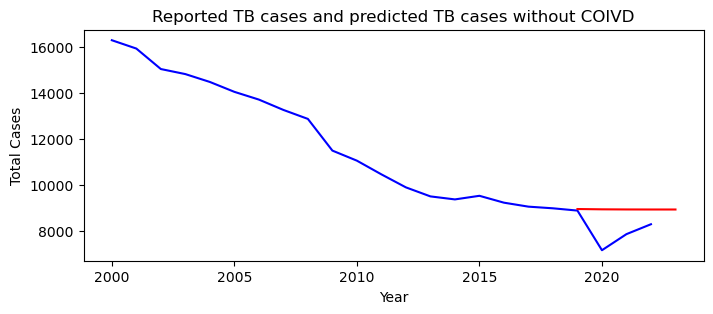

In [25]:
#make a graph to show the actaul data sorted by year and predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

plt.plot(tb_df_grouped['Year'], tb_df_grouped['Sum'], label='Reported Cases', color='blue')
plt.plot(tb_predictions['Year'], tb_predictions['LR_cases_predicted'], label='Predicted Cases', color='red')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Reported TB cases and predicted TB cases without COIVD')

plt.show()

In [26]:
# Export the DataFrame to a CSV file
tb_predictions.to_csv("Resources/tb_predictions.csv")

In [27]:
#disply predictions
tb_predictions

,Year,LR_cases_predicted
0,2019,8962.651209
1,2020,8949.332451
2,2021,8943.980071
3,2022,8942.116989
4,2023,8941.751469


In [28]:
#display the metrics of the chosen model
new_results_df_split.iloc[[7]]

,Model Detail,Score,R2,Mean Squared Error,Root Mean Squared Error,Standard Deviation
7,"By year, no age bins, and lags",0.996415,0.996415,8.785369,2.964012,49.5
